# Neural Style Transfer (NST)

NST employs a pretrained convolution neural network (CNN) to transfer styles from a given image or video to another. NST algorithms are characterized by their use of deep neural networks for the sake of image transformation. Common uses for NST are the creation of artificial artwork from photographs, for example by transferring the appearance of famous paintings to user-supplied photographs. Several notable mobile apps use NST techniques for this purpose, including DeepArt and Prisma. This method has been used by artists and designers around the globe to develop new artwork based on existent style(s)

  - [Tensor Flow](https://www.tensorflow.org/tutorials/generative/style_transfer)
  - [Wikipedia](https://en.wikipedia.org/wiki/Neural_Style_Transfer)
  - [NST Paper](https://arxiv.org/abs/1705.04058)
  - [Medium Link 1](https://medium.com/tensorflow/neural-style-transfer-creating-art-with-deep-learning-using-tf-keras-and-eager-execution-7d541ac31398)
  - [Medium Link NST Tutorial](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-neural-style-transfer-ef88e46697ee)
  
In this notebook pre-trained style transfer models are used and called for transfering style of an realtime video (webcam)
Pretrained models downloaded from belwo sources
  - [Source 1](https://github.com/rchavezj/OpenCV_Projects/tree/master/Sec11_Deep_Learning/01_Neural_Style_Transfer/models/instance_norm)
  - [Source 2](https://github.com/ProGamerGov/Torch-Models)

## NST of an Video

In [1]:
import argparse
import time
import os
import subprocess
import cv2 as cv

In [2]:
def predict(img, h, w):
    blob = cv.dnn.blobFromImage(img, 1.0, (w, h),
        (103.939, 116.779, 123.680), swapRB=False, crop=False)

    print ('[INFO] Setting the input to the model')
    net.setInput(blob)

    print ('[INFO] Starting Inference!')
    start = time.time()
    out = net.forward()
    end = time.time()
    print ('[INFO] Inference Completed successfully!')

    # Reshape the output tensor and add back in the mean subtraction, and
    # then swap the channel ordering
    out = out.reshape((3, out.shape[2], out.shape[3]))
    out[0] += 103.939
    out[1] += 116.779
    out[2] += 123.680
    out /= 255.0
    out = out.transpose(1, 2, 0)

    # Printing the inference time
    if False:
        print ('[INFO] The model ran in {:.4f} seconds'.format(end-start))

    return out

In [3]:
# Reference - https://github.com/jrosebr1/imutils/blob/4635e73e75965c6fef09347bead510f81142cf2e/imutils/convenience.py
#Line 65

def resize_img(img, width=None, height=None, inter=cv.INTER_AREA):
    dim = None
    h, w = img.shape[:2]

    if width is None and height is None:
        return img
    elif width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    elif height is None:
        r = width / float(w)
        dim = (width, int(h * r))

    resized = cv.resize(img, dim, interpolation=inter)
    return resized

In [4]:
models_path = './AI Experiments/Style'

In [5]:
# Checking if there are models available to load and list the same
models = []
for f in sorted(os.listdir(models_path)):
    if f.endswith('.t7'):
        models.append(f)

if len(models) == 0:
    raise Exception('The model path doesn\'t contains the models')

In [6]:
models

['candy.t7',
 'feathers.t7',
 'flame2000.t7',
 'flame500.t7',
 'la_muse.t7',
 'mosaic.t7',
 'rain.t7',
 'the_scream.t7',
 'udnie.t7']

In [7]:
# Loading the neural style transfer model
path = models_path + ('' if models_path.endswith('/') else '/')
print (path + models[2])
print ('[INFO] Loading the model...')

./AI Experiments/Style/flame2000.t7
[INFO] Loading the model...


In [8]:
model_loaded_i = -1
total_models = len(os.listdir(models_path))

In [9]:
model_loaded_i = 0
model_to_load = path + models[model_loaded_i]

In [10]:
net = cv.dnn.readNetFromTorch(model_to_load)
print ('[INFO] Model Loaded successfully!')

[INFO] Model Loaded successfully!


In [11]:
total_models

9

In [12]:
vid = cv.VideoCapture(0)
while True:
    _, frame = vid.read()
    img = resize_img(frame, width=600)
    h, w  = img.shape[:2]
    out = predict(img, h, w)

    cv.imshow('Style Transfer to Video', out)

    key = cv.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('n'): 
        model_loaded_i = (model_loaded_i + 1) % total_models
        model_to_load = path + models[model_loaded_i]
        net = cv.dnn.readNetFromTorch(model_to_load)
    elif key == ord('p'):
        model_loaded_i = (model_loaded_i - 1) % total_models
        model_to_load = path + models[model_loaded_i]
        net = cv.dnn.readNetFromTorch(model_to_load)

vid.release()
cv.destroyAllWindows()

[INFO] Setting the input to the model
[INFO] Starting Inference!
[INFO] Inference Completed successfully!
[INFO] Setting the input to the model
[INFO] Starting Inference!
[INFO] Inference Completed successfully!
[INFO] Setting the input to the model
[INFO] Starting Inference!
[INFO] Inference Completed successfully!
[INFO] Setting the input to the model
[INFO] Starting Inference!
[INFO] Inference Completed successfully!
[INFO] Setting the input to the model
[INFO] Starting Inference!
[INFO] Inference Completed successfully!
[INFO] Setting the input to the model
[INFO] Starting Inference!
[INFO] Inference Completed successfully!
[INFO] Setting the input to the model
[INFO] Starting Inference!
[INFO] Inference Completed successfully!
[INFO] Setting the input to the model
[INFO] Starting Inference!
[INFO] Inference Completed successfully!
[INFO] Setting the input to the model
[INFO] Starting Inference!
[INFO] Inference Completed successfully!


## NST of an Image

In [13]:
import subprocess
import numpy as np
from matplotlib import pyplot as plt

In [14]:
image_path = './Pictures/IMG_4508.jpeg'

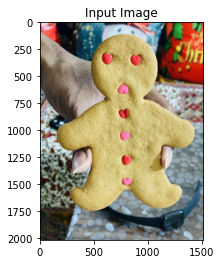

In [15]:
img = cv.imread(image_path)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Input Image'); plt.show()

In [21]:
# Load the neural style transfer model
path = models_path + ('' if models_path.endswith('/') else '/')
print (path + models[6])
print ('[INFO] Loading the model...')

./AI Experiments/Style/rain.t7
[INFO] Loading the model...


In [23]:
model_loaded_i = -1
total_models = len(os.listdir(models_path))

model_loaded_i = 0
model_to_load = path + models[model_loaded_i]

net = cv.dnn.readNetFromTorch(model_to_load)
print ('[INFO] Model Loaded successfully!')

[INFO] Model Loaded successfully!


In [24]:
print ('[INFO] Reading the image')
img = cv.imread(image_path)
print ('[INFO] Image Loaded successfully!')

img = resize_img(img, width=600)

h, w  = img.shape[:2]

# Get the output from the pretrained model
out = predict(img, h, w)

# show the image
if False:
    cv.imshow('Input Image', img)

cv.imshow('Style transferred image', out)
print ('[INFO] Hit Esc to close!')
cv.waitKey(0)

#if FLAGS.save_image_with_name is not None:
cv.imwrite("output.JPG",out)

[INFO] Reading the image
[INFO] Image Loaded successfully!
[INFO] Setting the input to the model
[INFO] Starting Inference!
[INFO] Inference Completed successfully!
[INFO] Hit Esc to close!


True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


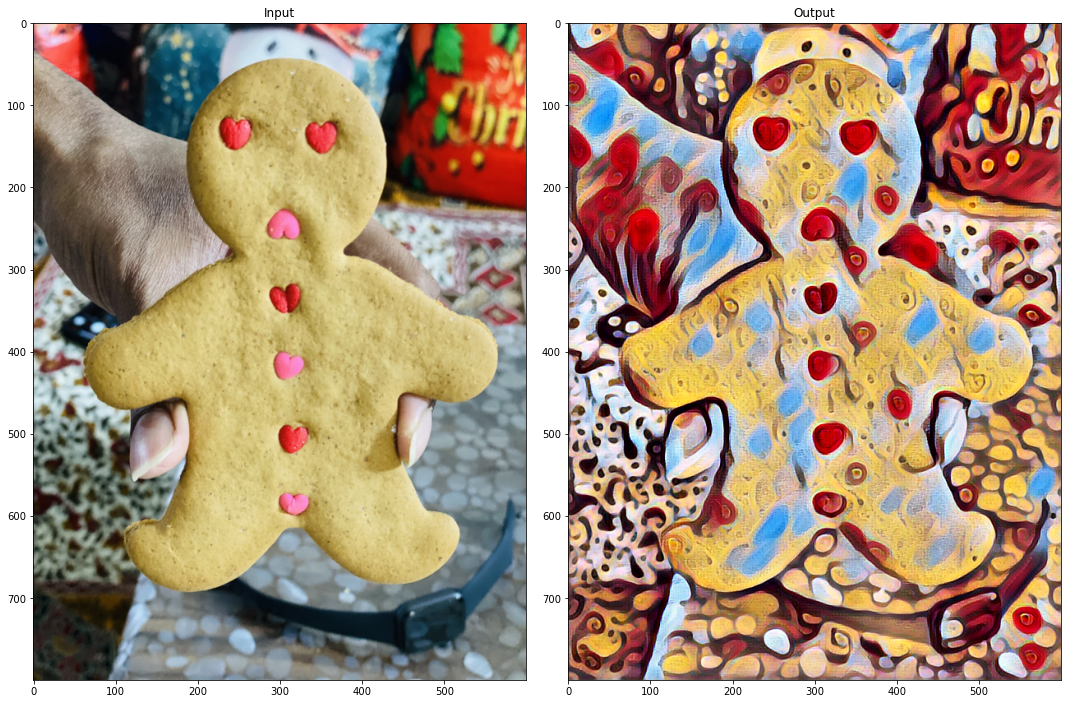

In [25]:
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('Input')
cv.imwrite('input.jpg', img)

axs[1].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
axs[1].set_title('Output')
cv.imwrite('output.jpg', out)

plt.show()